In [20]:
# NAME-C.PRANAV SHARMA
# ROLL NO- CB.SC.U4CSE23611
# SECTION - G

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

gtd = pd.read_csv("gtd.csv", encoding="latin1", low_memory=False)
ged = pd.read_csv("ged.csv", low_memory=False)
gdelt = pd.read_csv("gdelt_conflict.csv", low_memory=False)
ged231 = pd.read_csv("ged_231.csv", low_memory=False) 

In [14]:
#                                                      Terrorism And Political Violence 

Loading world map from a reliable source...
Map loaded successfully.


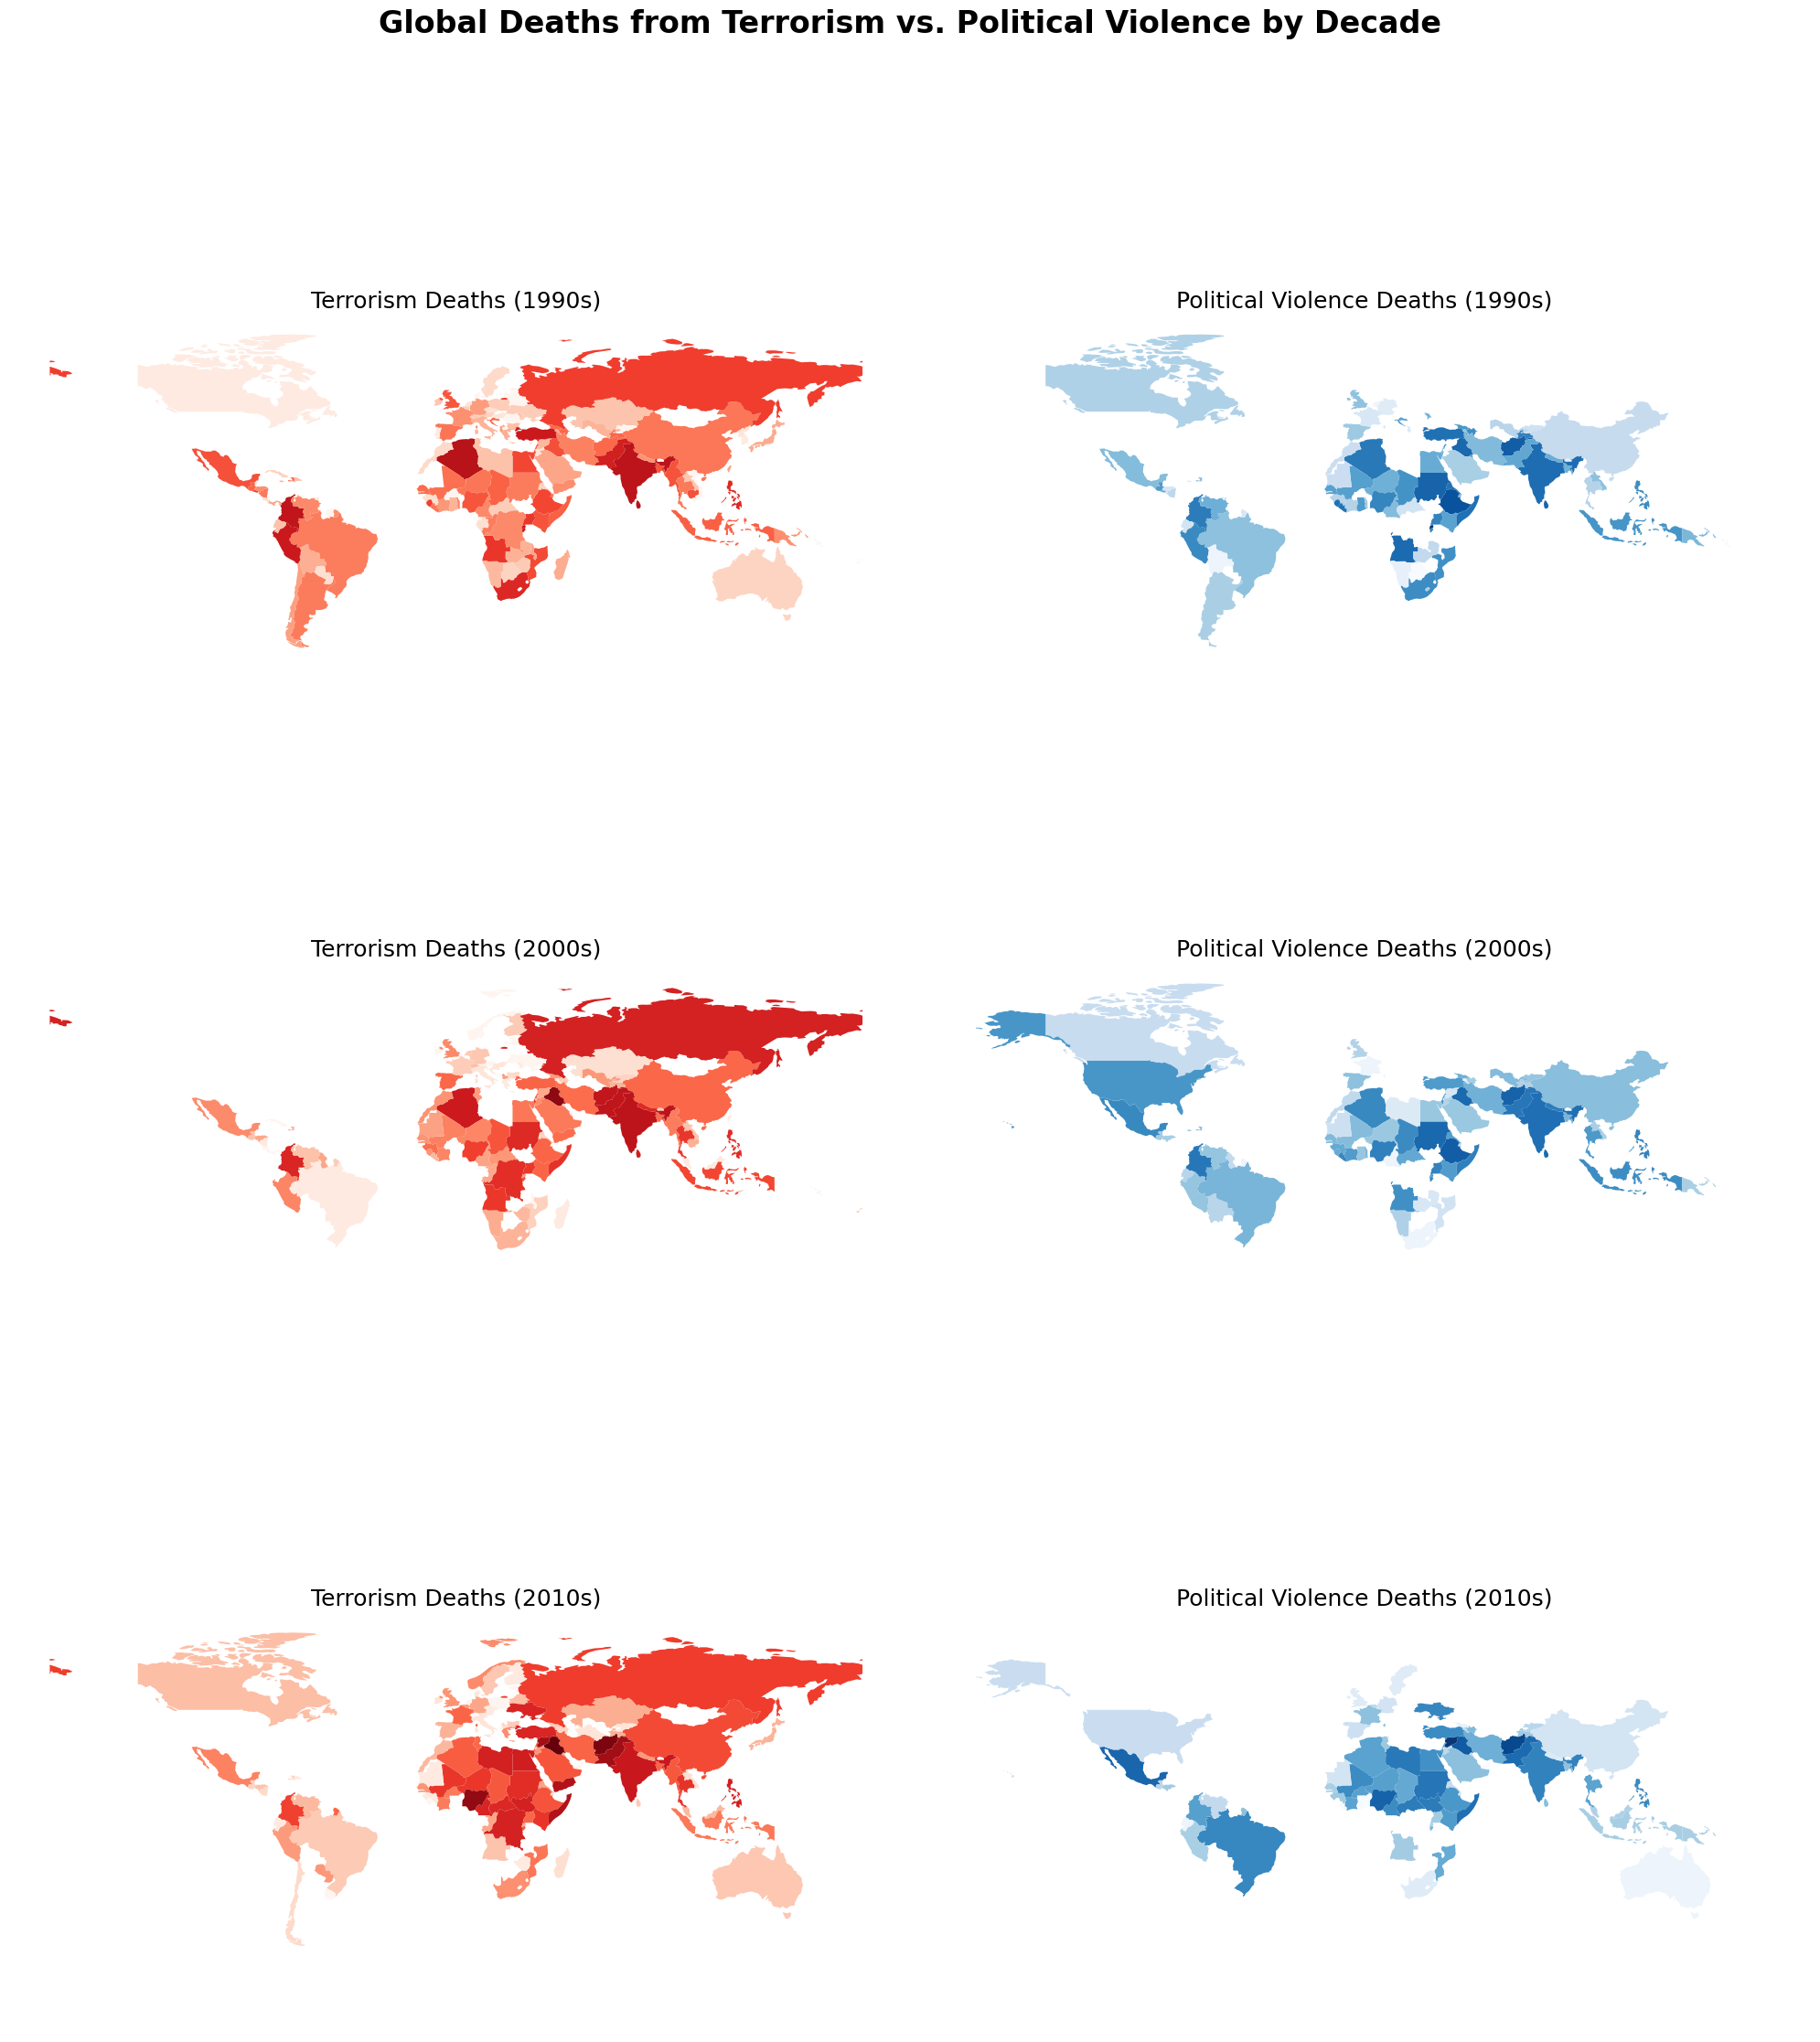

In [15]:
#Q1 How do total deaths from terrorism  compare to deaths from political violence  over time or by country
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import LogNorm

gtd['decade'] = (gtd['iyear'] // 10) * 10
ged['decade'] = (ged['year'] // 10) * 10

terror_deaths_decade = gtd.groupby(['country_txt', 'decade'])['nkill'].sum().reset_index()
conflict_deaths_decade = ged.groupby(['country', 'decade'])['best'].sum().reset_index()

conflict_deaths_decade = conflict_deaths_decade.rename(columns={'country': 'country_txt'})

try:
    print("Loading world map from a reliable source...")
    url = "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json"
    world = gpd.read_file(url)
    print("Map loaded successfully.")
except Exception as e:
    print(f"Could not load map data. An error occurred: {e}")
    world = None

if world is not None:
    decades_to_plot = [1990, 2000, 2010]
    vmax_terror = terror_deaths_decade['nkill'].max()
    vmax_conflict = conflict_deaths_decade['best'].max()

    fig, axes = plt.subplots(nrows=len(decades_to_plot), ncols=2, figsize=(20, 25))
    fig.suptitle('Global Deaths from Terrorism vs. Political Violence by Decade', fontsize=24, weight='bold')

    for i, decade in enumerate(decades_to_plot):
        terror_data = terror_deaths_decade[terror_deaths_decade['decade'] == decade]
        conflict_data = conflict_deaths_decade[conflict_deaths_decade['decade'] == decade]
        world_terror = world.merge(terror_data, left_on='name', right_on='country_txt', how='left').fillna(0)
        world_conflict = world.merge(conflict_data, left_on='name', right_on='country_txt', how='left').fillna(0)

        ax_terror = axes[i, 0]
        world_terror.plot(
            column='nkill',
            ax=ax_terror,
            cmap='Reds',
            norm=LogNorm(vmin=1, vmax=vmax_terror) # Consistent scale
        )
        ax_terror.set_title(f'Terrorism Deaths ({decade}s)', fontsize=18)
        ax_terror.set_axis_off()

        ax_conflict = axes[i, 1]
        world_conflict.plot(
            column='best',
            ax=ax_conflict,
            cmap='Blues',
            norm=LogNorm(vmin=1, vmax=vmax_conflict) # Consistent scale
        )
        ax_conflict.set_title(f'Political Violence Deaths ({decade}s)', fontsize=18)
        ax_conflict.set_axis_off()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


Generating visualization for Question 2 with contrasting colors...


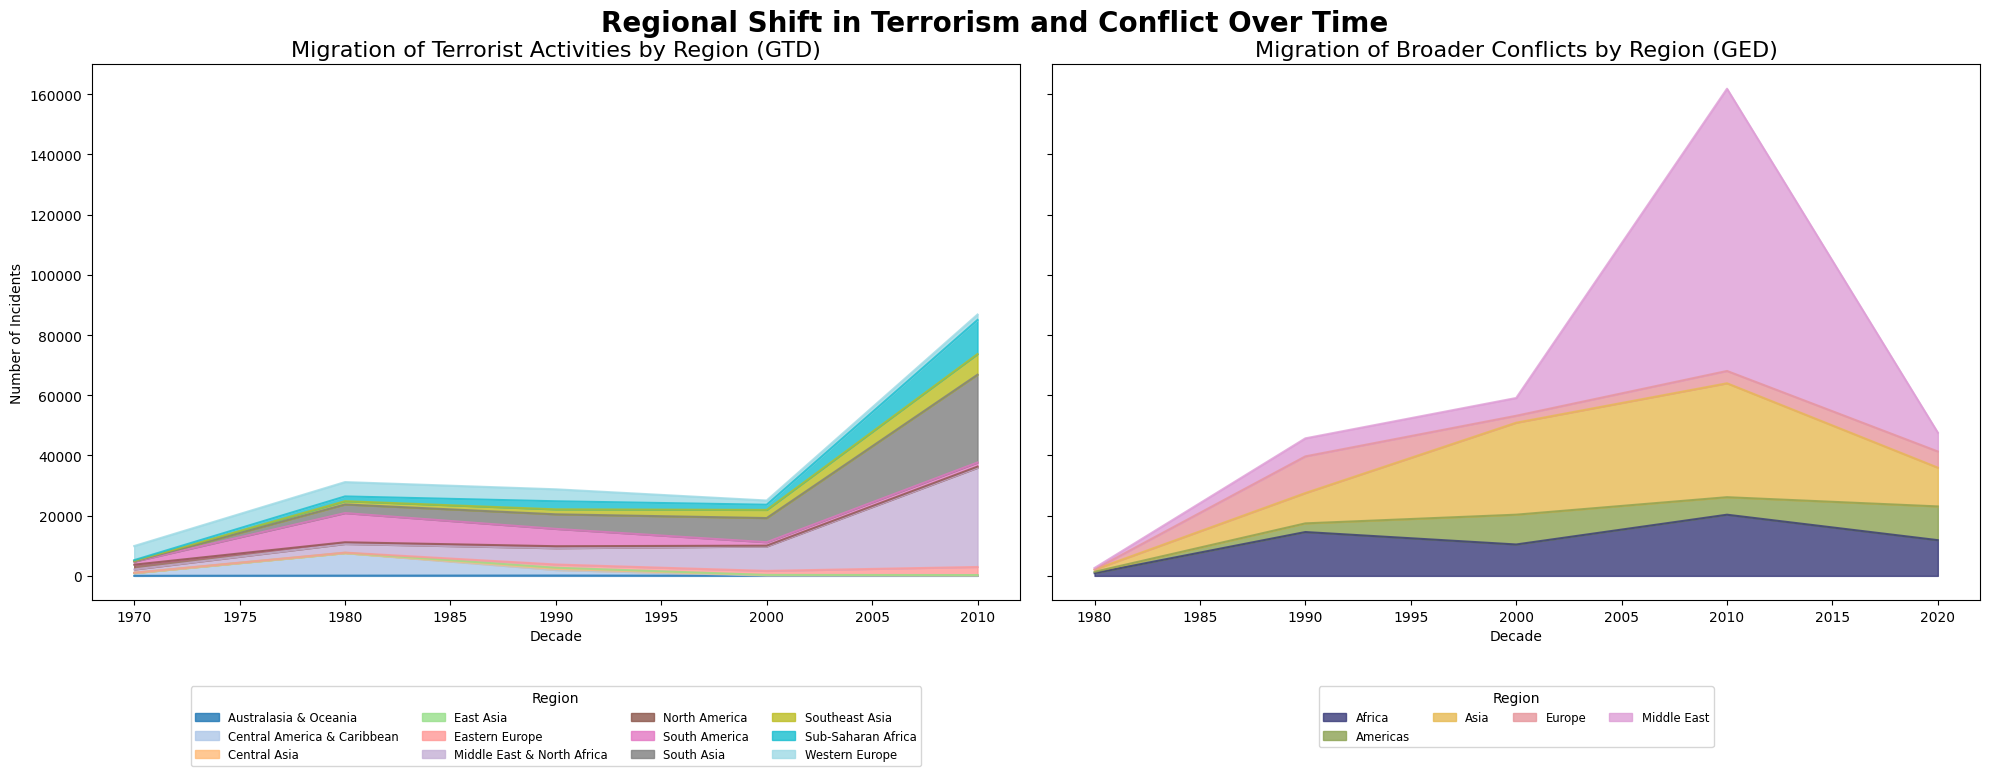

In [23]:
#Q2 What are the migration patterns of terrorist activities vs. broader conflict zones?

import pandas as pd
import matplotlib.pyplot as plt

print("\nGenerating visualization for Question 2 with contrasting colors...")

gtd['decade'] = (gtd['iyear'] // 10) * 10
ged231['decade'] = (ged231['year'] // 10) * 10

terror_by_region = (
    gtd.groupby(['decade', 'region_txt'])
       .size()
       .reset_index(name='terror_incidents')
)

conflict_by_region = (
    ged231.groupby(['decade', 'region'])
          .size()
          .reset_index(name='conflict_events')
)

terror_pivot = terror_by_region.pivot(index="decade", columns="region_txt", values="terror_incidents").fillna(0)
conflict_pivot = conflict_by_region.pivot(index="decade", columns="region", values="conflict_events").fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

colormap_terror = plt.get_cmap('tab20', len(terror_pivot.columns))
colormap_conflict = plt.get_cmap('tab20b', len(conflict_pivot.columns))

terror_pivot.plot.area(ax=axes[0], cmap=colormap_terror, alpha=0.8)
axes[0].set_title("Migration of Terrorist Activities by Region (GTD)", fontsize=16)
axes[0].set_xlabel("Decade")
axes[0].set_ylabel("Number of Incidents")
axes[0].legend(title='Region', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, fontsize='small')

conflict_pivot.plot.area(ax=axes[1], cmap=colormap_conflict, alpha=0.8)
axes[1].set_title("Migration of Broader Conflicts by Region (GED)", fontsize=16)
axes[1].set_xlabel("Decade")
axes[1].legend(title='Region', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("Regional Shift in Terrorism and Conflict Over Time", fontsize=20, weight='bold')
plt.show()


Generating visualization for Question 3...


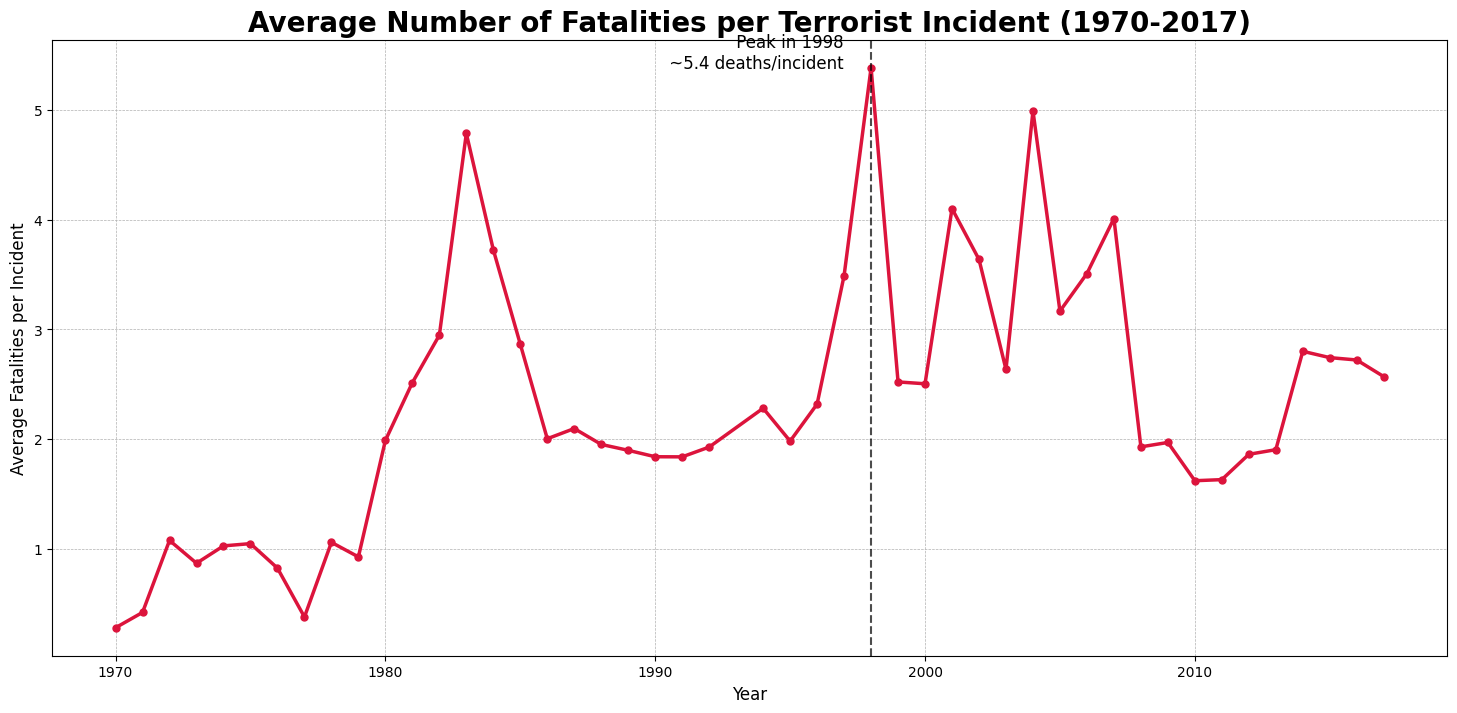

In [21]:
#Q3 How has the average number of fatalities per incident changed over time?
import pandas as pd
import matplotlib.pyplot as plt

print("\nGenerating visualization for Question 3...")

avg_fatalities_by_year = gtd.groupby('iyear')['nkill'].mean()

fig, ax = plt.subplots(figsize=(18, 8))
avg_fatalities_by_year.plot(
    ax=ax,
    color='crimson',
    linewidth=2.5,
    marker='o',
    markersize=5,
    linestyle='-'
)

ax.set_title("Average Number of Fatalities per Terrorist Incident (1970-2017)", fontsize=20, weight='bold')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Fatalities per Incident", fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
peak_year = avg_fatalities_by_year.idxmax()
peak_value = avg_fatalities_by_year.max()
ax.axvline(x=peak_year, color='black', linestyle='--', alpha=0.7)
ax.text(peak_year - 1, peak_value, f" Peak in {peak_year}\n ~{peak_value:.1f} deaths/incident",
        horizontalalignment='right', fontsize=12, color='black')

plt.show()


Generating visualization for Question 4...


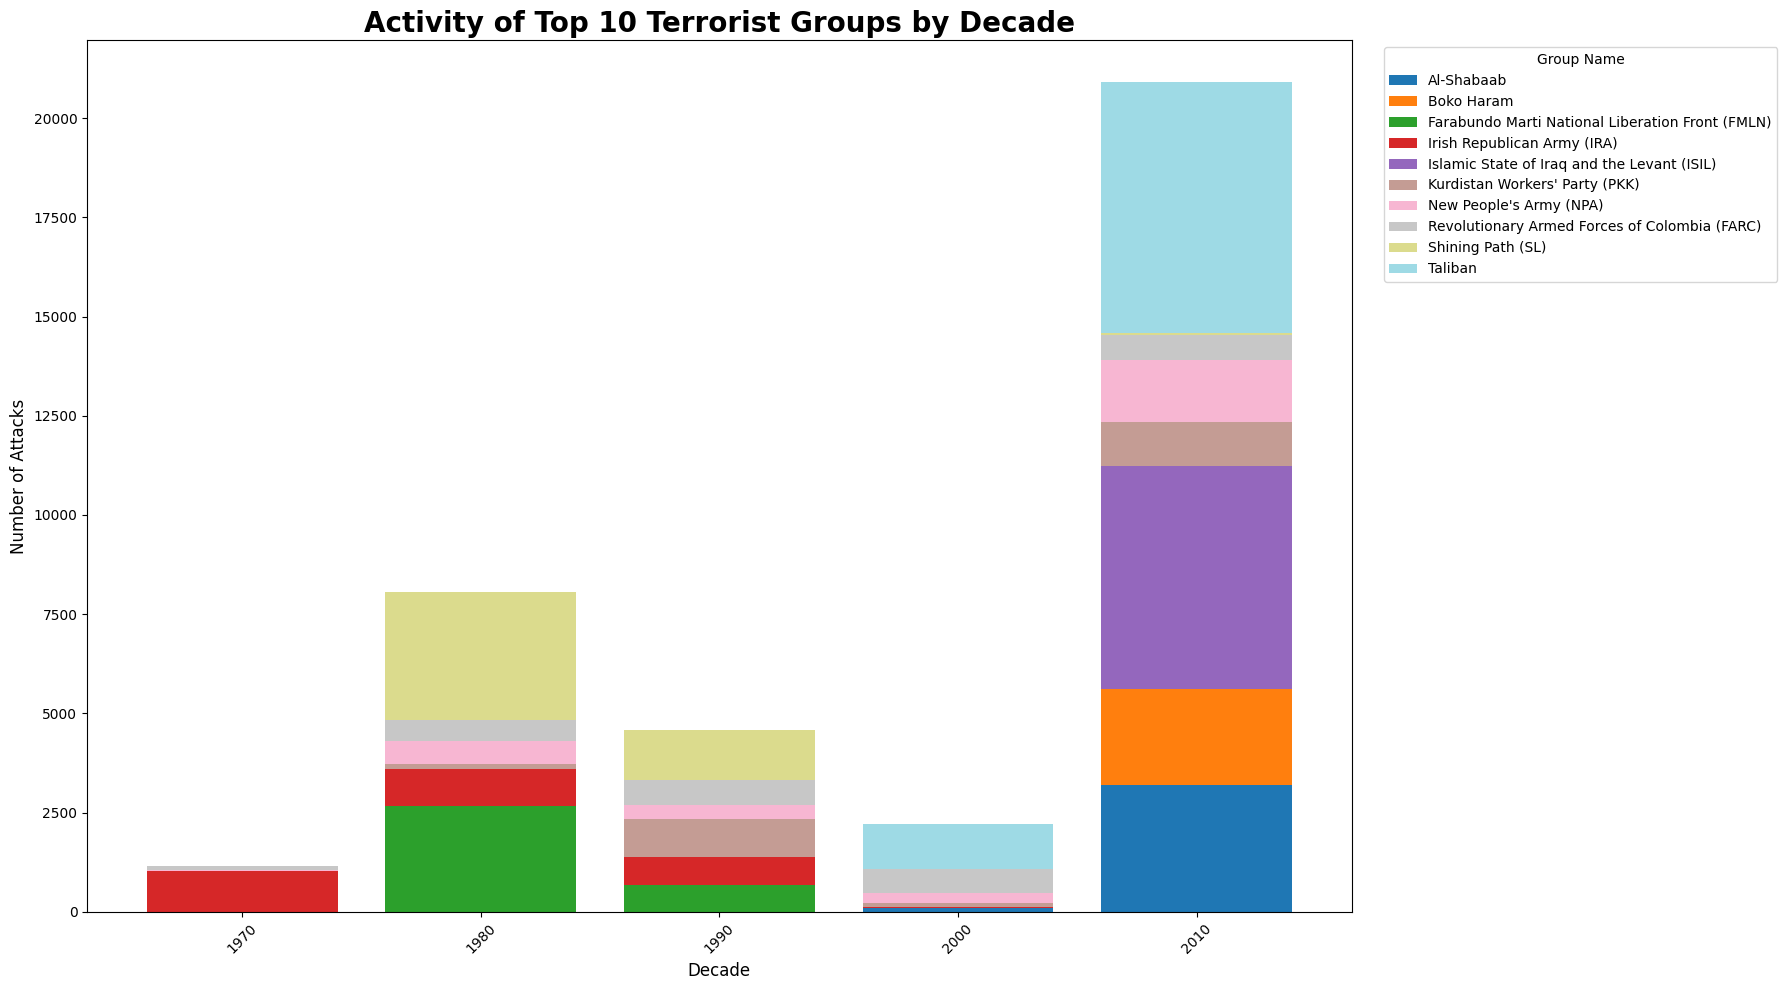

In [22]:
#Q4 Which terrorist groups or conflict actors are most active, and how has their activity shifted by decade?

import pandas as pd
import matplotlib.pyplot as plt
print("\nGenerating visualization for Question 4...")
gtd['decade'] = (gtd['iyear'] // 10) * 10

gtd_known_groups = gtd[gtd['gname'] != 'Unknown'].copy()

top_10_groups = gtd_known_groups['gname'].value_counts().nlargest(10).index

top_groups_activity_df = gtd_known_groups[gtd_known_groups['gname'].isin(top_10_groups)]

activity_by_decade = (
    top_groups_activity_df.groupby(['decade', 'gname'])
    .size()
    .unstack(fill_value=0)
)

fig, ax = plt.subplots(figsize=(18, 10))
activity_by_decade.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='tab20',
    width=0.8
)

ax.set_title("Activity of Top 10 Terrorist Groups by Decade", fontsize=20, weight='bold')
ax.set_xlabel("Decade", fontsize=12)
ax.set_ylabel("Number of Attacks", fontsize=12)
ax.legend(title='Group Name', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Generating the final, corrected global visualization for Question 5...


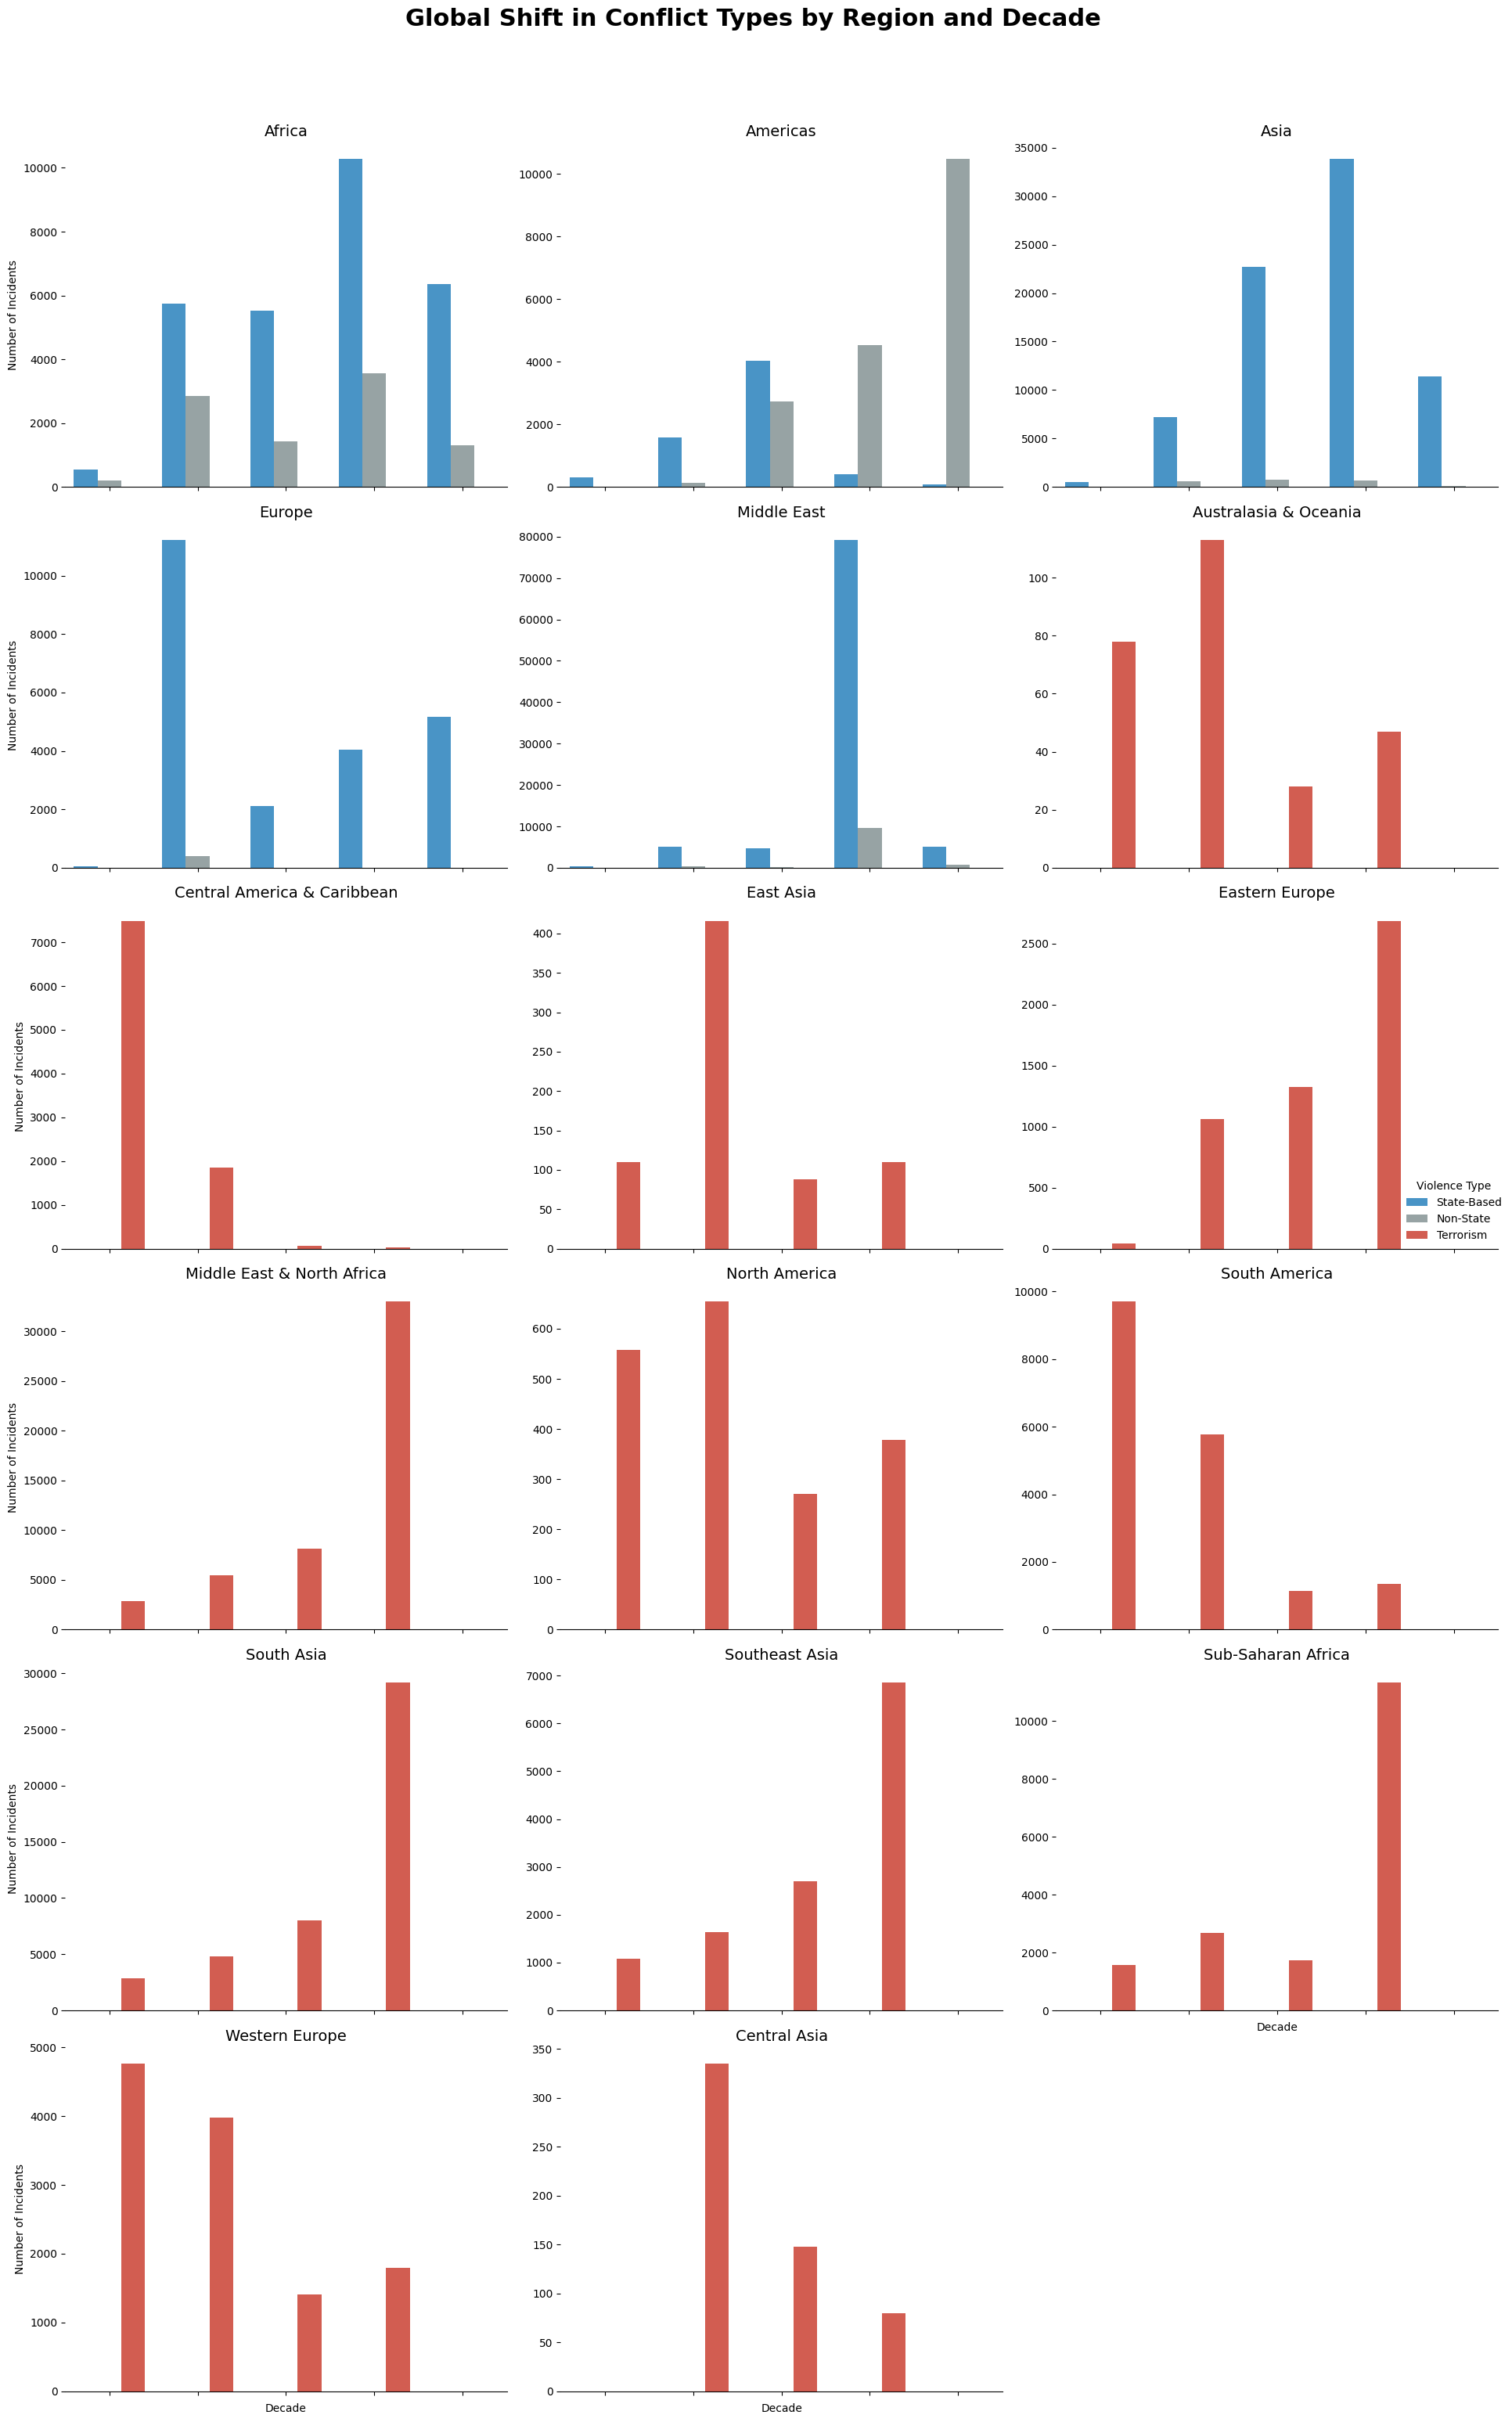

In [25]:
#Q5 Do regions that see a decline in state-based battles (GED) experience a rise in non-state conflict or terrorism (GTD) within the same decade?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\nGenerating the final, corrected global visualization for Question 5...")

ged231['decade'] = (ged231['year'] // 10) * 10
ged231['type'] = ged231['type_of_violence'].map({1: 'State-Based', 2: 'Non-State'})
conflict_counts = (
    ged231.dropna(subset=['type'])
    .groupby(['decade', 'region', 'type'])
    .size()
    .unstack(fill_value=0)
)

gtd['decade'] = (gtd['iyear'] // 10) * 10
terror_counts = gtd.groupby(['decade', 'region_txt']).size().rename('Terrorism')
terror_counts = terror_counts.reset_index().rename(columns={'region_txt': 'region'}).set_index(['decade', 'region'])

final_counts = pd.concat([conflict_counts, terror_counts], axis=1).fillna(0).reset_index()

plot_data = final_counts.melt(
    id_vars=['region', 'decade'],
    value_vars=['State-Based', 'Non-State', 'Terrorism'],
    var_name='Violence Type',
    value_name='Number of Incidents'
)
plot_data = plot_data[plot_data['decade'] >= 1980]

g = sns.catplot(
    data=plot_data,
    x='decade',
    y='Number of Incidents',
    hue='Violence Type',    
    col='region',          
    kind='bar',
    col_wrap=3,             
    height=5,
    aspect=1.2,
    palette={'State-Based': '#3498db', 'Non-State': '#95a5a6', 'Terrorism': '#e74c3c'},
    sharey=False           
)

g.fig.suptitle('Global Shift in Conflict Types by Region and Decade', y=1.03, fontsize=22, weight='bold')
g.set_titles("{col_name}", size=14) 
g.set_axis_labels("Decade", "Number of Incidents")
g.set_xticklabels(rotation=45)
g.despine(left=True) 
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

In [1]:
import pandas as pd

# --- Load and Process GTD Data ---
gtd = pd.read_csv("gtd.csv", usecols=['iyear', 'country_txt', 'nkill'],encoding="latin1", low_memory=False)
gtd.dropna(subset=['nkill'], inplace=True)
gtd['Decade'] = (gtd['iyear'] // 10) * 10
terror_deaths = gtd.groupby(['country_txt', 'Decade'])['nkill'].sum().reset_index()
terror_deaths.rename(columns={'country_txt': 'Country', 'nkill': 'Deaths'}, inplace=True)
terror_deaths['Violence Type'] = 'Terrorism Deaths'

# --- Load and Process GED Data ---
ged = pd.read_csv("ged.csv", usecols=['year', 'country', 'best'], low_memory=False)
ged.dropna(subset=['best'], inplace=True)
ged['Decade'] = (ged['year'] // 10) * 10
conflict_deaths = ged.groupby(['country', 'Decade'])['best'].sum().reset_index()
conflict_deaths.rename(columns={'country': 'Country', 'best': 'Deaths'}, inplace=True)
conflict_deaths['Violence Type'] = 'Political Violence Deaths'

# --- Combine into a single dataframe ---
final_df = pd.concat([terror_deaths, conflict_deaths])

# --- Filter for the decades we want to plot ---
decades_to_plot = [1990, 2000, 2010]
final_df = final_df[final_df['Decade'].isin(decades_to_plot)]

# --- EXPORT THE FINAL CSV ---
final_df.to_csv('global_deaths_data.csv', index=False)

print("SUCCESS: Your data is ready. Look for 'global_deaths_data.csv'.")

SUCCESS: Your data is ready. Look for 'global_deaths_data.csv'.


In [ ]:
import pandas as pd

# --- Assuming 'gtd' and 'ged231' are loaded from previous steps ---
# If not, uncomment and load them:
# gtd = pd.read_csv("gtd.csv", encoding="latin1", low_memory=False)
# ged231 = pd.read_csv("ged_231.csv", low_memory=False)

# --- Process GTD Data ---
gtd['Decade'] = (gtd['iyear'] // 10) * 10
terror_by_region = (
    gtd.groupby(['Decade', 'region_txt'])
       .size()
       .reset_index(name='Incidents')
)
terror_by_region.rename(columns={'region_txt': 'Region'}, inplace=True)
terror_by_region['Data Source'] = 'GTD'

# --- Process GED Data ---
ged231['Decade'] = (ged231['year'] // 10) * 10
conflict_by_region = (
    ged231.groupby(['Decade', 'region'])
          .size()
          .reset_index(name='Incidents')
)
conflict_by_region.rename(columns={'region': 'Region'}, inplace=True)
conflict_by_region['Data Source'] = 'GED'

# --- Combine into a single dataframe ---
final_df = pd.concat([terror_by_region, conflict_by_region])

# --- EXPORT THE FINAL CSV ---
final_df.to_csv('regional_shift_data.csv', index=False)

print("SUCCESS: Your data is ready. Look for 'regional_shift_data.csv'.")

In [1]:
import pandas as pd

# --- Assuming 'gtd' and 'ged231' are loaded from previous steps ---
# If not, uncomment and load them:
# gtd = pd.read_csv("gtd.csv", encoding="latin1", low_memory=False)
# ged231 = pd.read_csv("ged_231.csv", low_memory=False)

# --- Process GTD Data ---
gtd['Decade'] = (gtd['iyear'] // 10) * 10
terror_by_region = (
    gtd.groupby(['Decade', 'region_txt'])
       .size()
       .reset_index(name='Incidents')
)
terror_by_region.rename(columns={'region_txt': 'Region'}, inplace=True)
terror_by_region['Data Source'] = 'GTD'

# --- Process GED Data ---
ged231['Decade'] = (ged231['year'] // 10) * 10
conflict_by_region = (
    ged231.groupby(['Decade', 'region'])
          .size()
          .reset_index(name='Incidents')
)
conflict_by_region.rename(columns={'region': 'Region'}, inplace=True)
conflict_by_region['Data Source'] = 'GED'

# --- Combine into a single dataframe ---
final_df = pd.concat([terror_by_region, conflict_by_region])

# --- EXPORT THE FINAL CSV ---
final_df.to_csv('regional_shift_data.csv', index=False)

print("SUCCESS: Your data is ready. Look for 'regional_shift_data.csv'.")



NameError: name 'gtd' is not defined